In [1]:
# Exploratory Analysis

### Importing lib and Analysis

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
%matplotlib inline

In [3]:
nRowsRead = None # specify 'None' if want to read whole file
#df1 = pd.read_csv()
df1 = pd.read_csv("/Users/priyanshusankhala/Downloads/fivehundred.csv", delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'companies_sorted.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2847 rows and 14 columns


In [4]:
#df1 = pd.read_csv('../input/companies_sorted.csv', delimiter=',', nrows = nRowsRead)

In [5]:
df1.dataframeName = 'fivehundred.csv'

### Histogram

In [6]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [7]:
df1.head()

,Company Name,Company url,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,"""cecaci"" centro de capacitacion comercial e in...",linkedin.com,1,0.0,0.000,2.0,0.160,45.0,46,0.0,0.0,0,0.000000,0.0
1,3m health care,3m.com,1,1.0,0.333,1.0,0.333,21.0,11,0.0,0.0,1,0.000000,1.0
2,abb,global.abb,1,2.0,2.000,1.0,1.000,62.0,8,460.0,1640.0,1,3.565217,1.0
3,abbott,abbott.com,1,1.0,1.000,2.0,2.000,12.0,4,120.0,735.0,1,6.125000,1.0
4,abbvie,abbvie.com,1,1.0,1.000,1.0,0.000,41.0,4,203.0,1687.0,1,8.310345,1.0


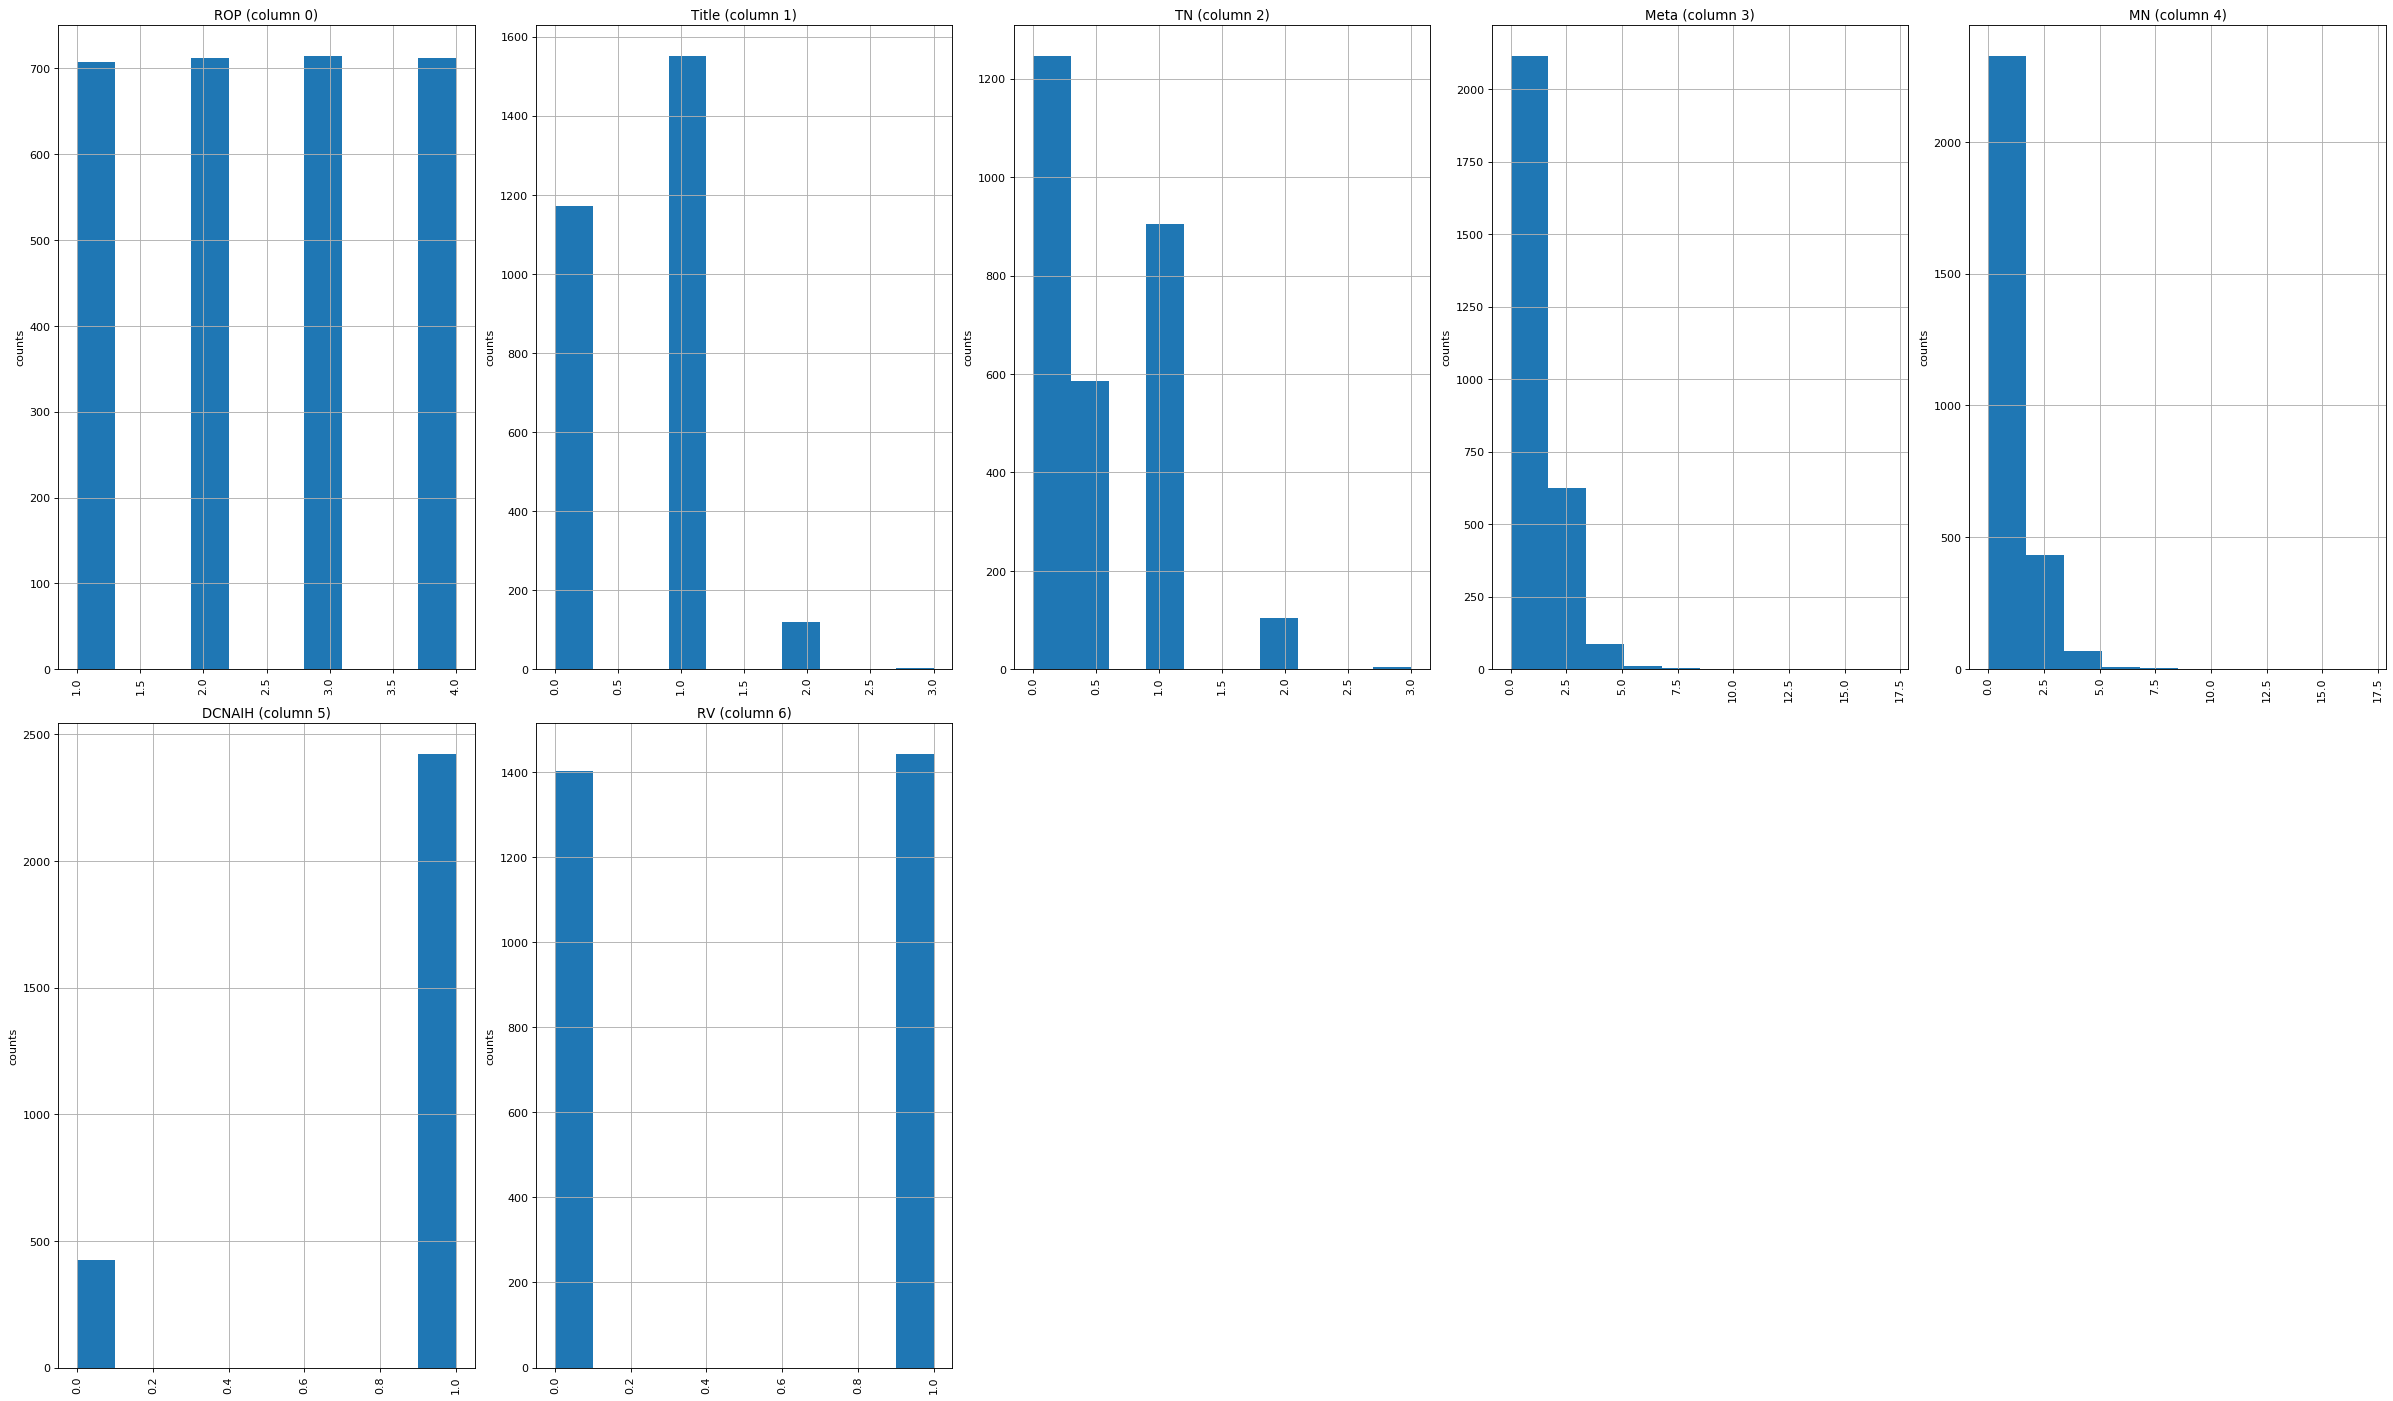

In [8]:
plotPerColumnDistribution(df1, 10, 5)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ddccf98>,
      dtype=object)

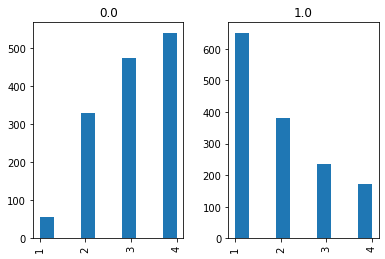

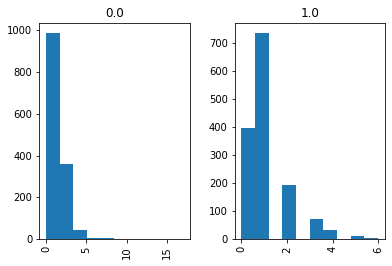

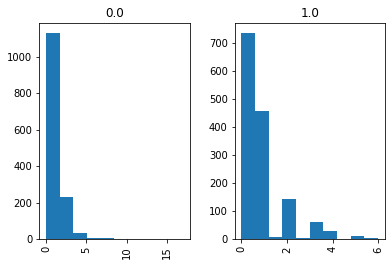

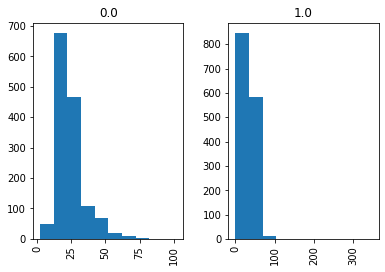

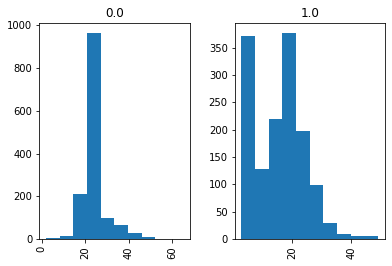

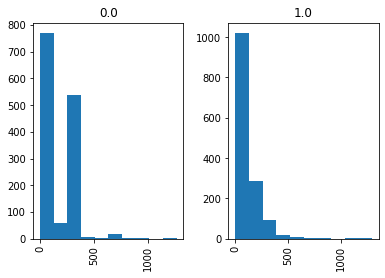

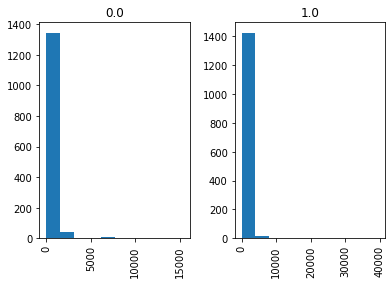

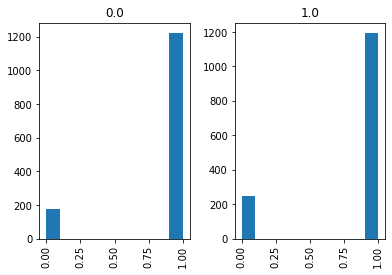

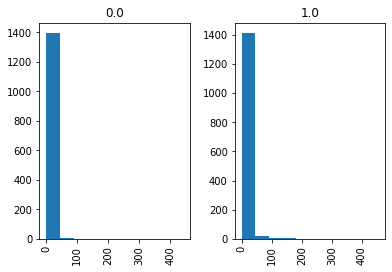

In [9]:
#df1.hist(column='TN', by='RV')
df1.hist(column='ROP', by='RV') 
df1.hist(column='Meta', by='RV')
df1.hist(column='MN', by='RV')
df1.hist(column='LVTN', by='RV')
df1.hist(column='LVDN', by='RV')
df1.hist(column='Links', by='RV')
df1.hist(column='Word', by='RV')
df1.hist(column='DCNAIH', by='RV')
df1.hist(column='RatioWL', by='RV')

In [113]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

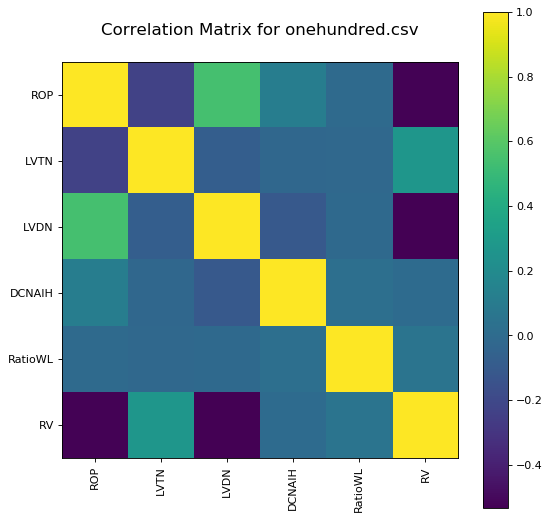

In [114]:
plotCorrelationMatrix(df1, 8)

### Scatter and Density plot

In [10]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ecf95c0>,
      dtype=object)

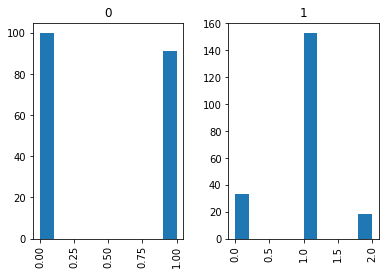

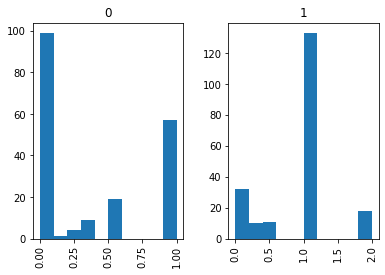

In [118]:
# from matplotlib.pyplot import hist
# df1 = pd.DataFrame({
#     'Title': np.random.randn(100),
#     'RV': 100 * np.random.rand()
# })
# hist(df1.RV, weights=df.Title)
#df1.hist(column='Title', by='RV', bins=35)
df1.hist(column='Title', by='RV')
df1.hist(column='TN', by='RV')
# df1.hist(column='ROP', by='RV')
# df1.hist(column='Meta', by='RV')
# df1.hist(column='MN', by='RV')
# df1.hist(column='LVTN', by='RV')
# df1.hist(column='LVDN', by='RV')
# df1.hist(column='Links', by='RV')
# df1.hist(column='Words', by='RV')
# df1.hist(column='DCNAIH', by='RV')
# df1.hist(column='RatioWL', by='RV')

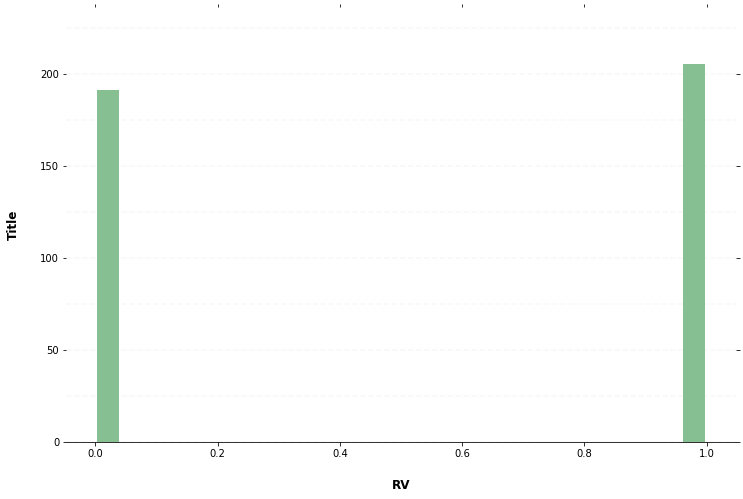

In [97]:
# ax = df1.hist(column='RV', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

# ax = ax[0]
# for x in ax:

#     # Despine
#     x.spines['right'].set_visible(False)
#     x.spines['top'].set_visible(False)
#     x.spines['left'].set_visible(False)

#     # Switch off ticks
#     x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#     # Draw horizontal axis lines
#     vals = x.get_yticks()
#     for tick in vals:
#         x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

#     # Remove title
#     x.set_title("")
#     # Set x-axis label
#     x.set_xlabel("RV", labelpad=20, weight='bold', size=12)

#     # Set y-axis label
#     x.set_ylabel("Title", labelpad=20, weight='bold', size=12)

#     # Format y-axis label
#    # x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

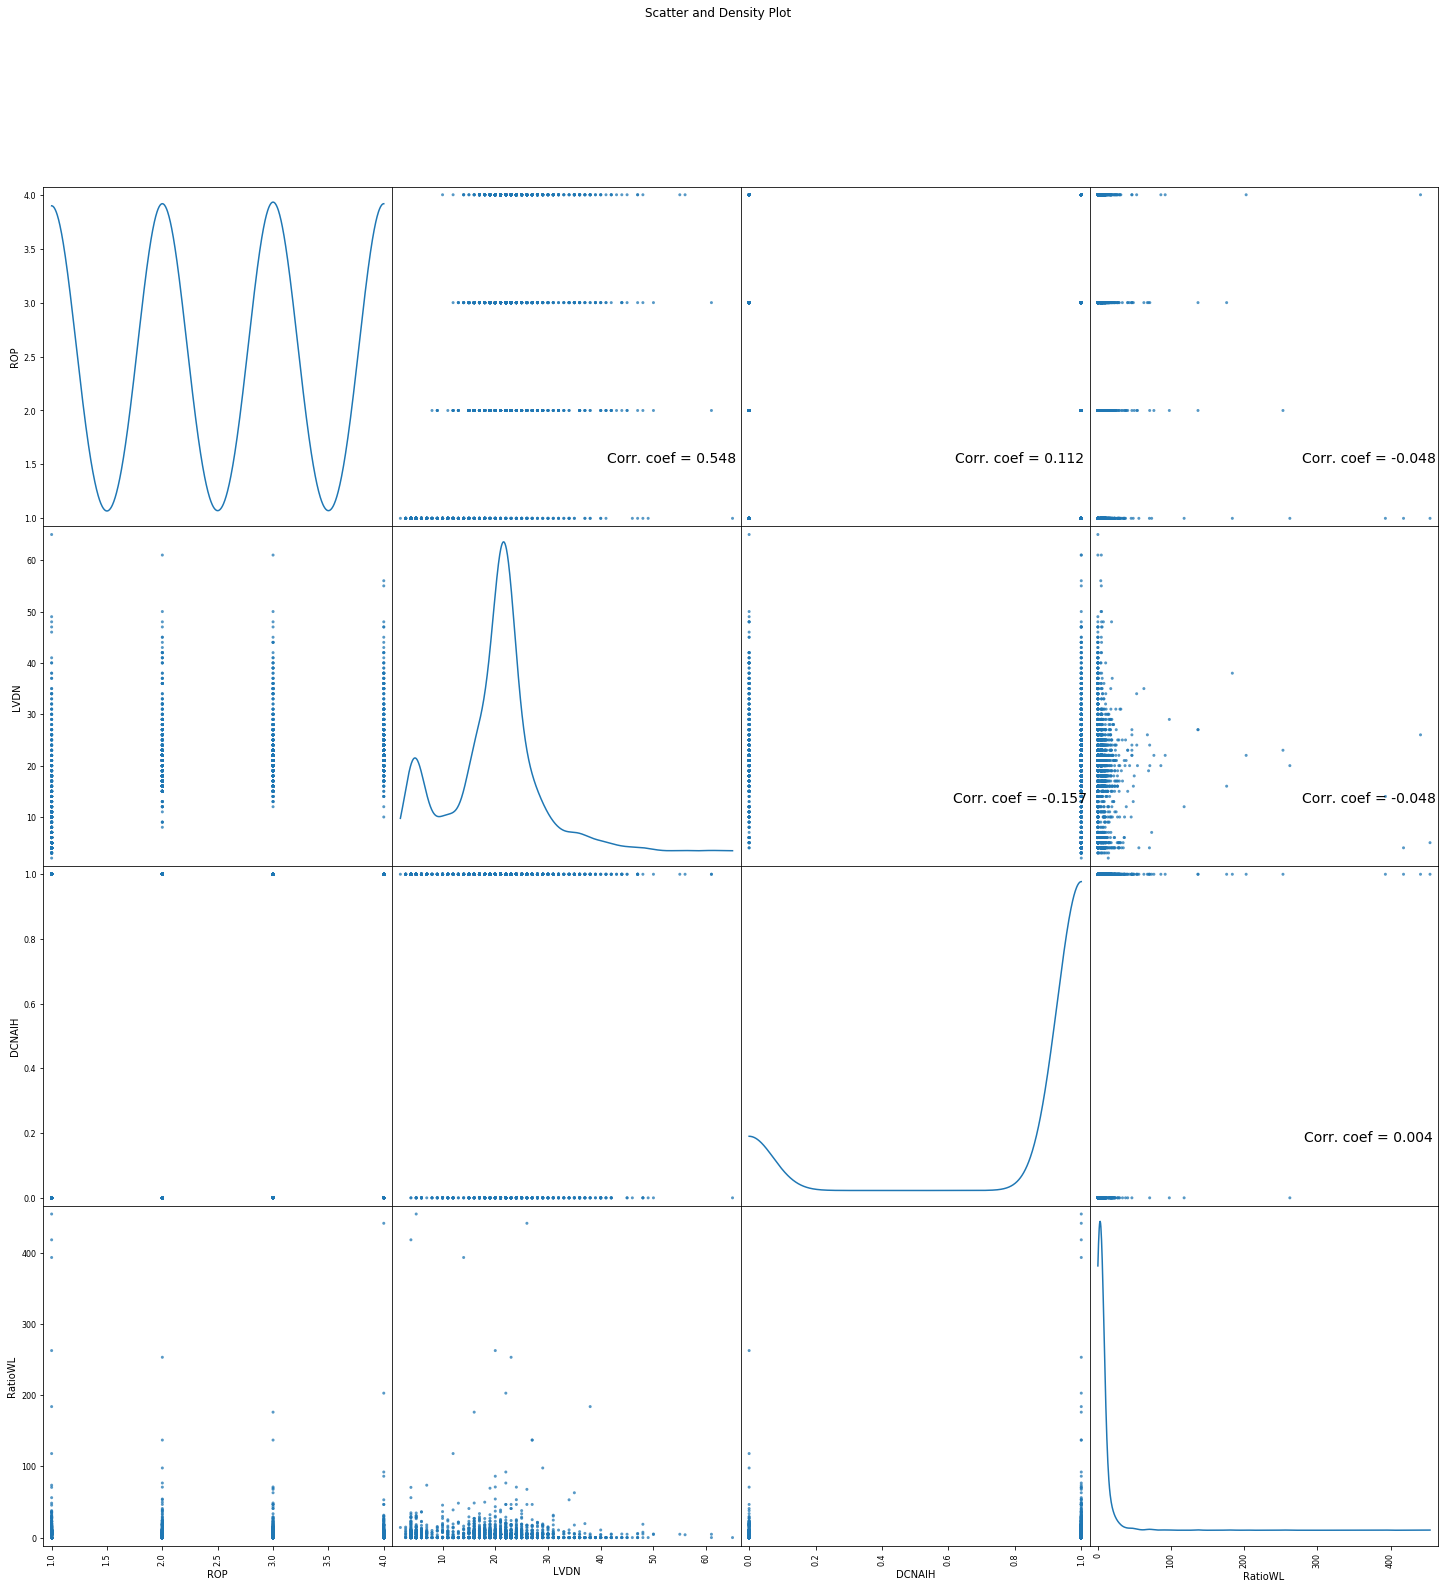

In [11]:
plotScatterMatrix(df1, 25, 14)

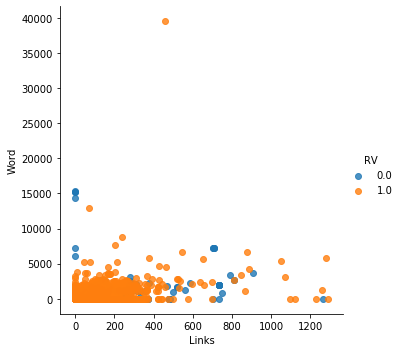

In [12]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='Links', y='Word', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

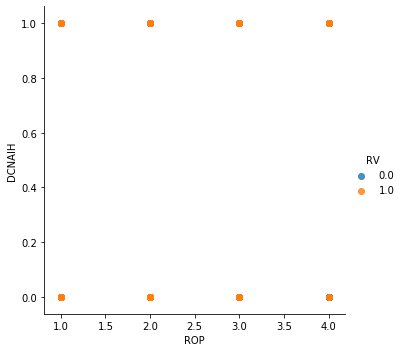

In [134]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='ROP', y='DCNAIH', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

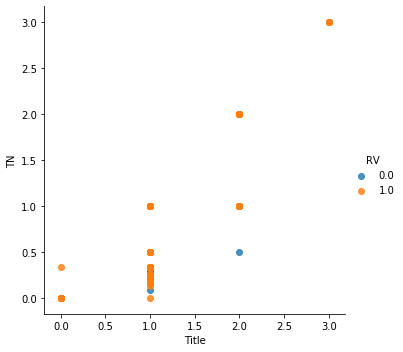

In [135]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='Title', y='TN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

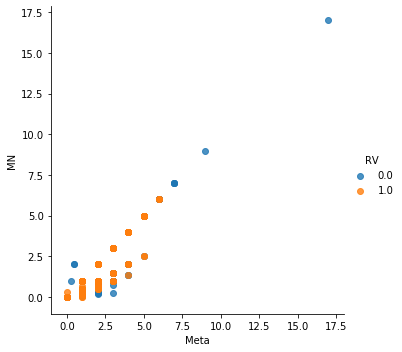

In [136]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='Meta', y='MN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

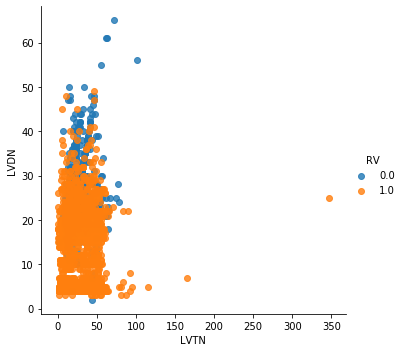

In [137]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='LVTN', y='LVDN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

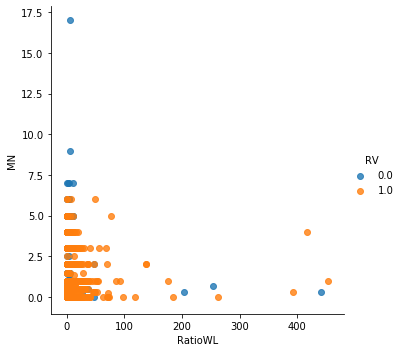

In [138]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='RatioWL', y='MN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

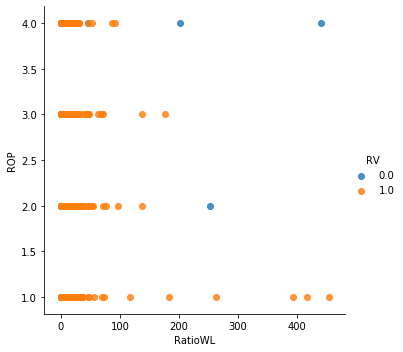

In [139]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='RatioWL', y='ROP', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

In [140]:
# # Multivariate scatter plots¶
# footballers = df1.copy()
# sns.lmplot(x='RatioWL', y='TN', hue='RV', 
#            data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
#            fit_reg=False)

In [141]:
# # from pandas.plotting import parallel_coordinates

# # p = (df1[(df1['Response Variable'].isin(["1", "0"]))]
# #          .loc[:, ['Response Variable''Rank of page', 'Appeared in Title', 'Number of words in company name appering in meta tag(4)', 'Levenshtein distance(Domain-Name)7', 'no. of links(8)', 'Word Count(9)']]
# #     )

# # parallel_coordinates(p, 'Response Variable')
# import plotly.express as px
# df1 = px.data.df1
# fig = px.parallel_coordinates(df1, color="Response Variable", labels={"Response Variable": "Response",
#                 "Rank of page": "Rank", "Appeared in Title": "Title",
#                 "Levenshtein distance(Domain-Name)7": "LV DIS", "no. of links(8)": "total links", },
#                              color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
# fig.show()

In [142]:

# sns.heatmap(
#     df1.loc[:, ['Rank of page', 'Appeared in Title', 'Number of words in company name appering in meta tag(4)', 'Levenshtein distance(Domain-Name)7', 'no. of links(8)', 'Word Count(9)', 'Response Variable']].corr(),
#     annot=True
# )

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn

from math import pi
from pandas.plotting import parallel_coordinates
# import plotly.graph_objs as go
# import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# importing libraries for plot
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [144]:
# # Rename all columns
# df2 = df1.rename(columns= {"Rank of page": "ROP",
#                      "Appeared in Title":"Title",
#                      "Number of words in company name appering in meta tag(4)":"Meta",
#                      "Ttile and normalized(3)":"TN",
#                      "Number of words in company name appering in meta tag,normalized(5)":"MN",
#                      "Levenshtein title and name(6)":"LVTN",
#                      "Levenshtein distance(Domain-Name)7":"LVDN",
#                      "no. of links(8)":"Links",
#                      "Word Count(9)":"Word",
#                      "Does Company name apperars in html(10)":"DCNAIH",
#                      "Ratio of words in the site content to all links on the page(11)":"RatioLW",
#                      "Response Variable":"RV"},
#                                  inplace = True)

In [145]:
df1.head()

,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,1,0.0,0.000,2.0,0.160,45.0,46,0.0,0.0,0,0.000000,0.0
1,1,1.0,0.333,1.0,0.333,21.0,11,0.0,0.0,1,0.000000,1.0
2,1,2.0,2.000,1.0,1.000,62.0,8,460.0,1640.0,1,3.565217,1.0
3,1,1.0,1.000,2.0,2.000,12.0,4,120.0,735.0,1,6.125000,1.0
4,1,1.0,1.000,1.0,0.000,41.0,4,203.0,1687.0,1,8.310345,1.0


### Parallel plot

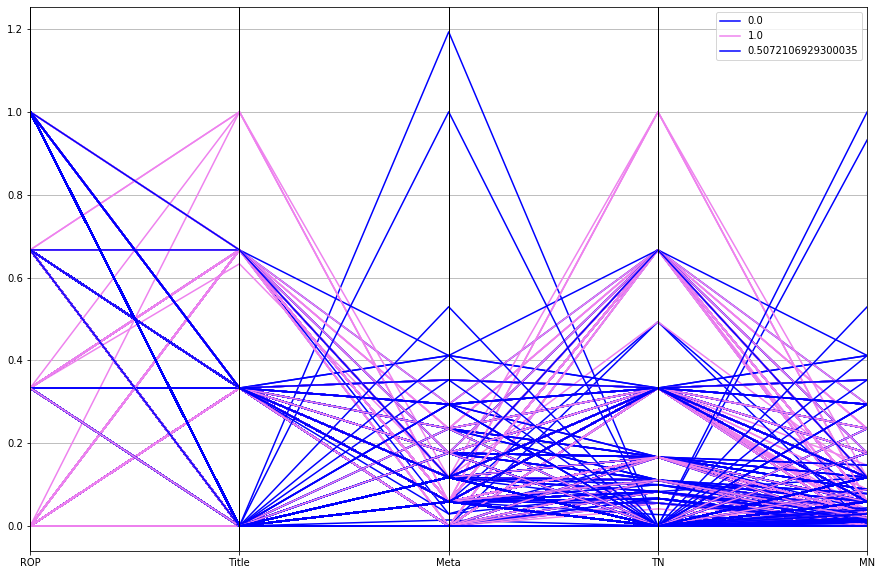

In [146]:
# Parallel Plot
d = df_normalized[['ROP', 'Title', 'Meta','TN','MN','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()


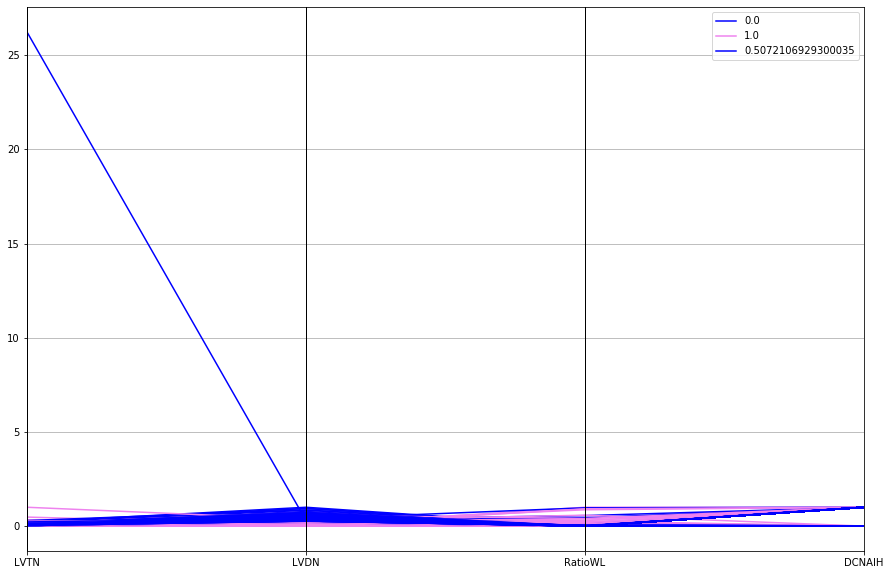

In [147]:
#'LVDN','MN','LVTN','DCNAIH','RatioWL',
# Parallel Plot
d = df_normalized[['LVTN','LVDN','RatioWL','DCNAIH','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()

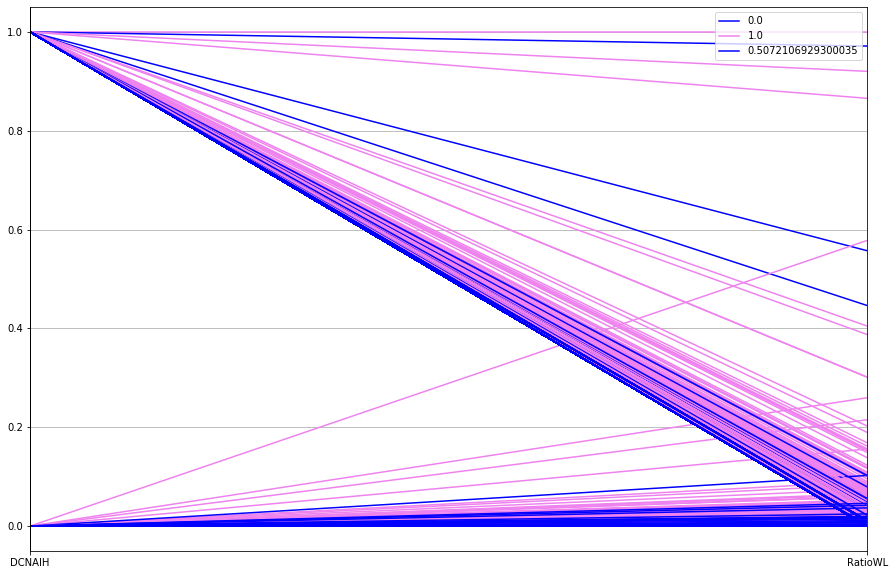

In [148]:
# Parallel Plot
d = df_normalized[['DCNAIH','RatioWL','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()

KeyError: nan

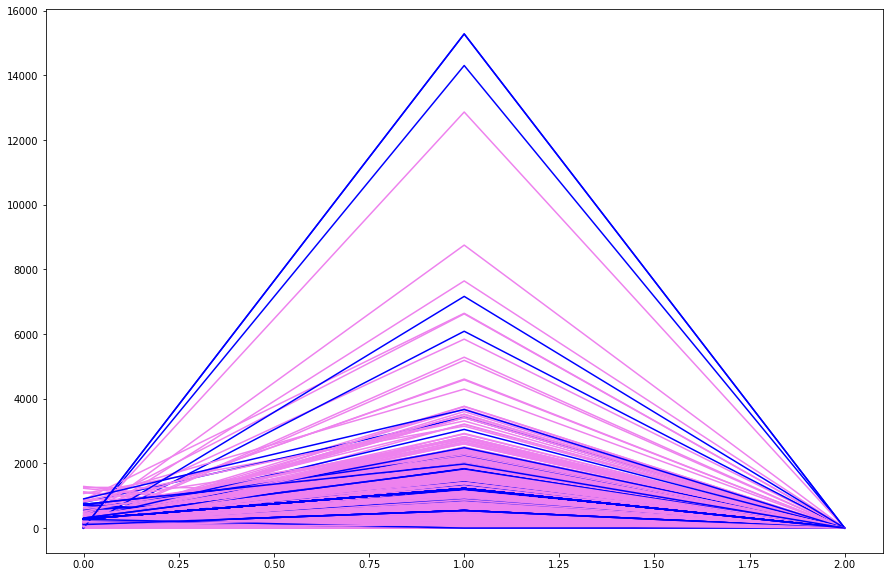

In [149]:
# Parallel Plot
d = df1[['Links','Word','DCNAIH','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()

In [18]:
from bokeh.plotting import figure, show
import pandas as pd

df2 = pd.DataFrame()

p = figure(x_axis_label="Title", y_axis_label="RV", 
           title="html tags")
p.circle("X", "Y", size=15, source=df)

show(p)


NameError: name 'df' is not defined

### Corelation plot

In [150]:
# Corelation Matrix
corrMatrix = df1.corr()
print (corrMatrix)

              ROP     Title        TN      Meta        MN      LVTN      LVDN  \
ROP      1.000000 -0.391628 -0.326160  0.085788  0.064204 -0.073462  0.547929   
Title   -0.391628  1.000000  0.891665  0.227798  0.239221  0.023615 -0.349990   
TN      -0.326160  0.891665  1.000000  0.268856  0.375128  0.088555 -0.371857   
Meta     0.085788  0.227798  0.268856  1.000000  0.918500 -0.010744 -0.076627   
MN       0.064204  0.239221  0.375128  0.918500  1.000000  0.026299 -0.109114   
LVTN    -0.073462  0.023615  0.088555 -0.010744  0.026299  1.000000 -0.057040   
LVDN     0.547929 -0.349990 -0.371857 -0.076627 -0.109114 -0.057040  1.000000   
Links   -0.007995  0.012270 -0.014745  0.048025  0.021162  0.021168 -0.040683   
Word    -0.010358  0.030022  0.026657  0.029026  0.025071  0.024683 -0.031958   
DCNAIH   0.111736  0.465829  0.391370  0.453004  0.362540 -0.084463 -0.157326   
RatioWL -0.047932  0.056076  0.057705  0.007106  0.009678  0.002757 -0.047779   
RV      -0.499727  0.264199 

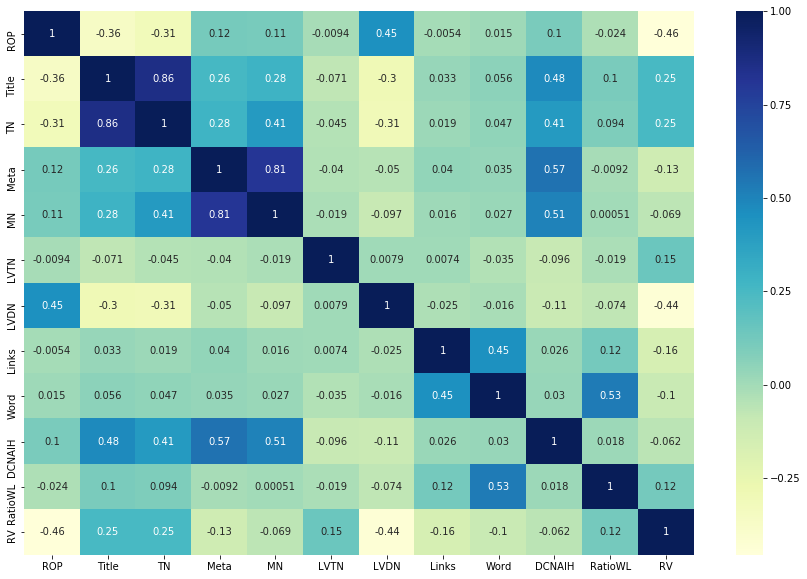

In [151]:
from scipy.stats.stats import kendalltau
corr = df1.corr(method='kendall')
#rcParams['figure.figsize'] = 14.7,8.27
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

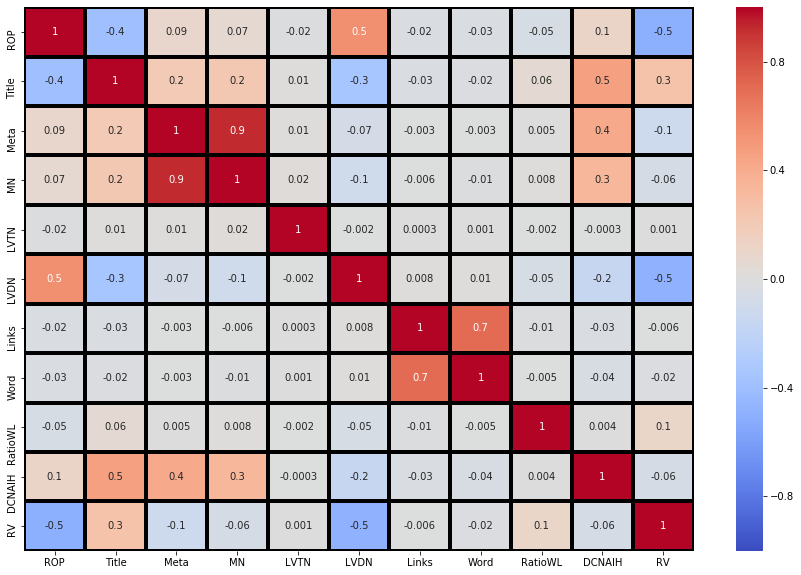

In [152]:
# Co relation Plot
from scipy.stats.stats import kendalltau
plt.figure(figsize=(15, 10))
sns.heatmap(
    df_normalized.loc[:, ['ROP', 'Title', 'Meta', 'MN', 'LVTN', 'LVDN', 'Links', 'Word', 'RatioWL','DCNAIH','RV']].corr(),
    annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black'
)

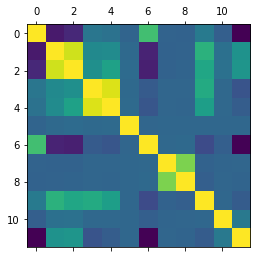

In [153]:
# import matplotlib.pyplot as plt
# plt.imshow(df_normalized.corr(), cmap='coolwarm', interpolation='none')
# plt.colorbar()
# plt.xticks(range(len(df_normalized.columns)), df_normailezed.colums, rotation=90)
# plt.yticks(range(len(df_normalized.columns)), df_normailezed.colums)
# plt.gef().set_size_inches(0,8)

# labels = df_normalized.corr().values
# for y in range(labels.shape[0]):
#     for x in range(labels.shape[1]):
#         plt.text(x,y, '{:.2f}'.format(labels[y,x]), ha='center', va='center', color='white')    
import matplotlib.pyplot as plt

plt.matshow(df_normalized.corr())
plt.show()

In [ ]:
df1_pairplot = df1.dropna()
sns.pairplot(df1_pairplot, height=1.5)

### Normalizing data

In [15]:
# # # # Example Data
# # # x =     df1.loc[:, ['ROP', 'Title', 'Meta', 'MN', 'LVTN', 'LVDN', 'Links', 'Word', 'RatioWL','DCNAIH','RV']]

# # # #Normalized Data
# # # normalized = (x-min(x))/(max(x)-min(x))

# # # # Histogram of example data and normalized data
# # # par(mfrow=c(1,2))
# # # hist(x,          breaks=10, xlab="Data",            col="lightblue", main="")
# # # hist(normalized, breaks=10, xlab="Normalized Data", col="lightblue", main="")

# # # copy the data
# # df_max_scaled = df1.copy()
  
# # # apply normalization techniques
# # for column in df_max_scaled.columns:
# #     df_max_scaled[column] = (x-min(x))/(max(x)-min(x))
# #     df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# # # view normalized data
# # display(df_max_scaled)
# # copy the data
# df_min_max_scaled = df1.copy()
  
# # apply normalization techniques
# for column in df_min_max_scaled.columns:
#     df_min_max_scaled[column] = int(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / int(df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# # view normalized data
# print(df_min_max_scaled)

In [16]:
# #df1.drop(df1. columns[1],axis=1,inplace=True)
# df1.drop('Company Name',axis=1).head()
# df1.drop('Company url',axis=1).head()

In [19]:
df1.head()

,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,1,0.0,0.000,2.0,0.160,45.0,46,0.0,0.0,0,0.000000,0.0
1,1,1.0,0.333,1.0,0.333,21.0,11,0.0,0.0,1,0.000000,1.0
2,1,2.0,2.000,1.0,1.000,62.0,8,460.0,1640.0,1,3.565217,1.0
3,1,1.0,1.000,2.0,2.000,12.0,4,120.0,735.0,1,6.125000,1.0
4,1,1.0,1.000,1.0,0.000,41.0,4,203.0,1687.0,1,8.310345,1.0


In [18]:
df1.drop(['Company Name','Company url'],axis=1, inplace=True)

In [17]:
# # apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
# def maximum_absolute_scaling(df1):
#     # copy the dataframe
#     df_scaled = df1.copy()
#     # apply maximum absolute scaling
#     for column in df_scaled.columns:
#         df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
#     return df_scaled
    
# # call the maximum_absolute_scaling function
# df_scaled = maximum_absolute_scaling(df1)

# df_scaled

In [20]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df1):
    # copy the dataframe
    df_norm = df1.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_normalized = min_max_scaling(df1)

df_normalized

,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,0.0,0.000000,0.000000,0.117647,0.009412,0.129683,0.698413,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.333333,0.111000,0.058824,0.019588,0.060519,0.142857,0.000000,0.000000,1.0,0.000000,1.0
2,0.0,0.666667,0.666667,0.058824,0.058824,0.178674,0.095238,0.357143,0.041499,1.0,0.007853,1.0
3,0.0,0.333333,0.333333,0.117647,0.117647,0.034582,0.031746,0.093168,0.018599,1.0,0.013491,1.0
4,0.0,0.333333,0.333333,0.058824,0.000000,0.118156,0.031746,0.157609,0.042688,1.0,0.018305,1.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.051873,0.142857,0.000000,0.000000,0.0,0.000000,1.0
6,0.0,0.333333,0.333333,0.058824,0.058824,0.144092,0.063492,0.085404,0.015107,1.0,0.011954,1.0
7,0.0,0.333333,0.111000,0.176471,0.058824,0.057637,0.126984,0.140528,0.000000,1.0,0.000000,1.0
8,0.0,0.333333,0.333333,0.117647,0.117647,0.054755,0.142857,0.125776,0.021585,1.0,0.011598,1.0
9,0.0,0.333333,0.333333,0.000000,0.000000,0.025937,0.031746,0.055124,0.003087,1.0,0.003785,1.0


In [30]:
df_normalized['MN'].fillna((df1['MN'].mean()), inplace=True)
df_normalized['Title'].fillna((df1['Title'].mean()), inplace=True)
df_normalized['TN'].fillna((df1['TN'].mean()), inplace=True)
df_normalized['Meta'].fillna((df1['Meta'].mean()), inplace=True)
df_normalized['Links'].fillna((df1['Links'].mean()), inplace=True)
df_normalized['Word'].fillna((df1['Word'].mean()), inplace=True)
df_normalized['LVTN'].fillna((df1['LVTN'].mean()), inplace=True)
df_normalized['RV'].fillna((df1['RV'].mean()), inplace=True)

In [31]:
df_normalized.isnull().sum()

ROP        0
Title      0
TN         0
Meta       0
MN         0
LVTN       0
LVDN       0
Links      0
Word       0
DCNAIH     0
RatioWL    0
RV         0
dtype: int64

In [32]:
df_normalized.head()

,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,0.0,0.000000,0.000000,0.117647,0.009412,0.129683,0.698413,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.333333,0.111000,0.058824,0.019588,0.060519,0.142857,0.000000,0.000000,1.0,0.000000,1.0
2,0.0,0.666667,0.666667,0.058824,0.058824,0.178674,0.095238,0.357143,0.041499,1.0,0.007853,1.0
3,0.0,0.333333,0.333333,0.117647,0.117647,0.034582,0.031746,0.093168,0.018599,1.0,0.013491,1.0
4,0.0,0.333333,0.333333,0.058824,0.000000,0.118156,0.031746,0.157609,0.042688,1.0,0.018305,1.0


## Sampling and feature elimination if we have imbalance class

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
#x, y = df1(return_X_y=True)

In [34]:
df1['RV'].value_counts()

1.0    1442
0.0    1401
Name: RV, dtype: int64

In [35]:
# To check if we have a imbalance class
count_incorrect_link = len(df_normalized[df_normalized['RV']==0])
count_correct_link = len(df_normalized[df_normalized['RV']==1])
pct_of_no_sub = count_incorrect_link/(count_incorrect_link+count_correct_link)
print("percentage of Incorrect link is", pct_of_no_sub*100)
pct_of_sub = count_correct_link/(count_incorrect_link+count_correct_link)
print("percentage of Correct link", pct_of_sub*100)


percentage of Incorrect link is 49.278930706999645
percentage of Correct link 50.721069293000355


In [36]:
df1.groupby('RV').mean()

,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL
RV,,,,,,,,,,,
0.0,3.068522,0.480371,0.341820,1.313036,0.992996,22.712143,23.756602,160.512143,768.246429,0.872948,4.219045
1.0,1.951456,0.781402,0.639633,1.076976,0.874003,29.662275,15.708044,111.103400,686.986130,0.828710,8.472267


In [37]:
df_normalized.groupby('ROP').mean()

,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
ROP,,,,,,,,,,,
0.000000,0.274482,0.216835,0.063310,0.050096,0.087326,0.138059,0.286236,1.043307,0.816384,0.017489,0.919492
0.333333,0.263998,0.204213,0.069832,0.054851,0.106654,0.310839,0.303994,0.019647,0.831461,0.013889,0.536517
0.666667,0.248951,0.186371,0.067174,0.051279,0.067653,0.325075,0.121477,0.020425,0.813986,0.013546,0.334306
1.000000,0.057584,0.051654,0.081938,0.064374,0.077696,0.347022,0.089992,0.016106,0.941011,0.011223,0.241573


### Logistic Regression

In [70]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)

In [71]:
X = df_normalized.loc[:, df_normalized.columns != 'RV']
y = df_normalized.loc[:, df_normalized.columns == 'RV']

In [69]:
# from sklearn import preprocessing
# from sklearn import utils

# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(X_train, y_train)
# # lab_enc = preprocessing.LabelEncoder()
# # training_scores_encoded = lab_enc.fit_transform(training_scores_Y)
# # print(training_scores_encoded)
# # print(utils.multiclass.type_of_target(training_scores_Y))
# # print(utils.multiclass.type_of_target(training_scores_Y.astype('int')))
# # print(utils.multiclass.type_of_target(training_scores_encoded))

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [40]:
#  SMOTE-Synthetic Minority Oversampling Technique 
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [26]:
# data_final_vars=df_normalized.columns.values.tolist()

# # y=['y']
# # X=[i for i in data_final_vars if i not in y]

# # from sklearn.feature_selection import RFE
# # from sklearn.linear_model import LogisticRegression
# # logreg = LogisticRegression()
# # rfe = RFE(logreg, 20)
# # rfe = rfe.fit(X, y.values.ravel())
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)# print(rfe.support_)
# # print(rfe.ranking_)

In [27]:
#print(y)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.astype('int'))

LogisticRegression()

In [73]:
#np.any(np.isnan(df_normalized))
np.all(np.isfinite(df_normalized))

True

In [25]:
# #decisions = (model.predict_proba() >= mythreshold).astype(int)
# y_pred_new_threshold = (logreg.predict_proba(X_test)[:,1]>=0.6).astype(int)


In [79]:
# # fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(X_train, y_train.astype('int'))
# yhat = model.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# yhat = yhat[:, 1]
# # calculate roc curves
# fpr, tpr, thresholds = roc_curve(y_test, yhat)
# # plot the roc curve for the model
# plt.plot([0,1], [0,1], linestyle='--', label='No Match')
# plt.plot(fpr, tpr, marker='.', label='Logistic')
# #axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# # show the plot
# plt.show()

In [80]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# # split into train/test sets
# trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# # fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(trainX, trainy)
# # predict probabilities
# yhat = model.predict_proba(testX)
# # keep probabilities for the positive outcome only
# yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Match')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

ValueError: continuous format is not supported

In [81]:
# calculate pr-curve
# pr curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Match')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

ValueError: continuous format is not supported

In [133]:
...
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

ValueError: continuous format is not supported

In [131]:
from sklearn.metrics import f1_score
# evaluate the model
score = f1_score(y_test.astype('int'), yhat)
# print('F-Score: %.5f' % score)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [83]:
### Changing Threshold
from pylab import *
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)

def to_labels(pos_probs, threshold):
	return (pos_probs >=0.5).astype('int')
# y_pred_new_threshold = (logreg.predict_proba(X_test)[:,1]>=0.6).astype(int)
# 	return (pos_probs >=thresholds).astype('int')
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [130]:
# y_pred = logreg.predict(X_test)
y_pred = model.predict(X_test)
y_pred = y_pred
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test.astype('int'))))
roc_auc_score(y_test.astype('int'), lr_probs)

Accuracy of logistic regression classifier on test set: 0.81


NameError: name 'lr_probs' is not defined

In [129]:
## Confusion Matirx
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test.astype('int'), y_pred)
print(confusion_matrix)

[[299 106]
 [135 315]]


In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype('int'), y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       405
           1       0.75      0.70      0.72       450

    accuracy                           0.72       855
   macro avg       0.72      0.72      0.72       855
weighted avg       0.72      0.72      0.72       855



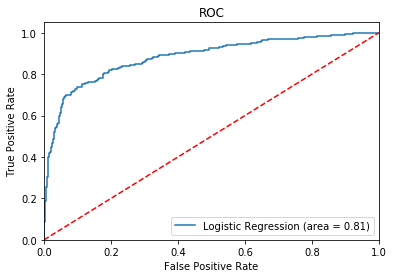

In [126]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test.astype('int'), logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test.astype('int'), logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [88]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test.astype('int'))))

Accuracy of logistic regression classifier on test set: 0.81


In [89]:
y_pred1 = logreg.predict_proba(X)
y_pred1

array([[0.68081092, 0.31918908],
       [0.09451703, 0.90548297],
       [0.07314585, 0.92685415],
       ...,
       [0.57549658, 0.42450342],
       [0.53512413, 0.46487587],
       [0.66554336, 0.33445664]])

In [90]:
y_pred1[-4:]

array([[0.54868073, 0.45131927],
       [0.57549658, 0.42450342],
       [0.53512413, 0.46487587],
       [0.66554336, 0.33445664]])

In [91]:
y_pred2 = logreg.predict(X)
y_pred2[-4:]

array([0, 0, 0, 0])

### Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train.astype('int'))

y_pred = gnb.predict(X_test)

In [94]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train.astype('int'))

#Predict Output
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1

In [95]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=49) # 70% training and 30% test

In [96]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train.astype('int'))

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [98]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.astype('int'), y_pred))

Accuracy: 0.5345029239766081


In [64]:
# #Prior probablity
# import numpy as np
# #df_normalized.columns = df_normalized.columns.get_level_values(0)
# means = X_train.groupby(y_train).apply(np.mean)
# stds = X_train.groupby(y_train).apply(np.std)
# probs = X_train.groupby(y_train).apply(lambda x: len(x))/X_train.shape[0]

In [99]:
y_test

,RV
87,1.0
2427,1.0
268,1.0
830,1.0
82,1.0
2547,0.0
1563,0.0
1058,1.0
2832,1.0
1448,0.0


In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test.astype('int'), gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: continuous format is not supported

In [102]:
y_pred1 = gnb.predict(X)
y_pred1[-4:]

array([1, 1, 1, 1])

In [103]:
y_pred2 = gnb.predict_proba(X)
y_pred2[-4:]

array([[1.66089545e-03, 9.98339105e-01],
       [8.31044895e-04, 9.99168955e-01],
       [1.60717751e-03, 9.98392822e-01],
       [2.59772362e-03, 9.97402276e-01]])

### Descision Trees

In [104]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [105]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train.astype('int'))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [106]:
print("Accuracy:",metrics.accuracy_score(y_test.astype('int'), y_pred))

Accuracy: 0.8643274853801169


In [107]:
## optimizing descision tress
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train.astype('int'))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.astype('int'), y_pred))

Accuracy: 0.8514619883040936


In [108]:
y_pred1 = clf.predict_proba(X)
y_pred1[-4:]

array([[0.41818182, 0.58181818],
       [0.41818182, 0.58181818],
       [0.63010753, 0.36989247],
       [0.63010753, 0.36989247]])

In [109]:
y_pred2 = clf.predict(X)
y_pred2[-4:]

array([1, 1, 0, 0])

In [110]:
## Visulasing Descision trees

In [62]:
# feature_cols = ['insulin', 'bmi', 'age','glucose','bp','pedigree']
# X = pima[feature_cols] # Features
# y = pima.label # Target variable
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('match1.png')
Image(graph.create_png())

NameError: name 'feature_cols' is not defined

### Random Forest 

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train,y_train.astype('int'))

RandomForestClassifier(max_features='sqrt')

In [118]:
# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]
# rf_probs

In [119]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_pred, rf_probs)
roc_value

0.978979795981181

### Random Forest save model

In [115]:
# %pwd

In [34]:
import pickle
model_pkl = open('/Users/priyanshusankhala/Documents/rf.pkl', 'wb')
# filname = ('/Users/priyanshusankhala/Documents')
pickle.dump(model, model_pkl)

In [ ]:
# Loading the saved decision tree model pickle
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'rb')
decision_tree_model = pickle.load(decision_tree_model_pkl)

In [42]:
df_normalized.iloc[3:4, :-1]

,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL
3,0.0,0.5,0.5,0.4,0.4,0.066667,0.016129,0.112254,0.051388,1.0,0.013491


In [43]:
model.predict(df_normalized.iloc[3:4, :-1])

array([1.])

In [78]:
roc_value

0.9860755896561523

In [70]:
rf_probs

array([0.81, 0.83, 0.03, 0.99, 0.  , 0.  , 0.17, 0.68, 0.07, 0.  , 0.99,
       0.03, 0.01, 1.  , 0.  , 0.47, 0.98, 0.63, 0.84, 0.03, 0.42, 0.86,
       1.  , 0.18, 0.93, 0.98, 0.99, 0.77, 0.44, 0.91, 0.67, 0.11, 0.59,
       0.81, 0.75, 1.  , 0.35, 0.89, 0.4 , 0.97, 0.  , 0.  , 0.01, 0.21,
       0.01, 0.49, 1.  , 0.13, 0.  , 0.02, 0.06, 1.  , 0.61, 0.23, 0.07,
       0.  , 0.  , 0.01, 0.01, 0.05, 0.99, 0.31, 0.02, 0.96, 0.57, 0.85,
       0.01, 0.48, 0.76, 0.  , 0.7 , 0.13, 0.03, 0.01, 0.82, 0.24, 0.9 ,
       1.  , 0.06, 0.84, 0.9 , 0.02, 0.76, 0.61, 0.19, 0.98, 0.  , 0.01,
       0.02, 0.36, 0.01, 0.88, 0.01, 0.29, 0.81, 0.81, 0.99, 0.39, 0.  ,
       0.  , 0.48, 0.01, 0.02, 0.99, 0.98, 0.02, 0.99, 0.46, 0.01, 0.1 ,
       0.78, 0.99, 0.26, 0.32, 0.01, 1.  , 0.04, 0.96, 0.97, 0.  ])

In [71]:
rf_predictions

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0.])

In [79]:
y_pred1 = model.predict_proba(X)
y_pred1[-4:]

array([[0.2 , 0.8 ],
       [0.91, 0.09],
       [0.79, 0.21],
       [0.64, 0.36]])

In [80]:
y_pred2  = model.predict(X)
y_pred2[-4:]

array([1., 0., 0., 0.])

### SVM

In [120]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train.astype('int'))

SVC(random_state=1)

In [121]:
y_pred = classifier.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype('int'),y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.7181286549707603


In [123]:
y_pred1 = classifier.decision_function(X)
y_pred1[-4:]

array([-0.73651978, -0.73128016, -0.71920264, -0.77154357])

In [124]:
y_pred2 = classifier.predict(X)
y_pred2[-4:]

array([0, 0, 0, 0])

### pipeline

In [ ]:
from web import get_score
get_score